<a href="https://colab.research.google.com/github/nagrotte/MachineLearning/blob/main/Bagging_classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

# Generate synthetic dataset
np.random.seed(0)
num_samples = 1000
num_features = 5

# Features (e.g., patient data)
X = np.random.randn(num_samples, num_features)

# Target variable (e.g., medical condition)
y = np.random.choice([0, 1], size=num_samples)

# Create a DataFrame
data = pd.DataFrame(data=X, columns=[f"Feature_{i+1}" for i in range(num_features)])
data["Target"] = y

print(data.head())


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Target
0   1.764052   0.400157   0.978738   2.240893   1.867558       1
1  -0.977278   0.950088  -0.151357  -0.103219   0.410599       0
2   0.144044   1.454274   0.761038   0.121675   0.443863       0
3   0.333674   1.494079  -0.205158   0.313068  -0.854096       1
4  -2.552990   0.653619   0.864436  -0.742165   2.269755       0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to perform bootstrap sampling and train multiple models
def train_bagging_models(base_estimator, X, y, n_estimators, random_state=None):
    models = []
    for _ in range(n_estimators):
        # Perform bootstrap sampling
        indices = np.random.choice(len(X), len(X), replace=True)
        X_resampled, y_resampled = X[indices], y[indices]

        # Train base estimator on resampled data
        model = base_estimator.fit(X_resampled, y_resampled)
        models.append(model)
    return models

# Train bagging models
bagging_models = train_bagging_models(DecisionTreeClassifier(random_state=42), X_train, y_train, n_estimators=10, random_state=42)

# Non-bagging model (single decision tree)
non_bagging_model = DecisionTreeClassifier(random_state=42)
non_bagging_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

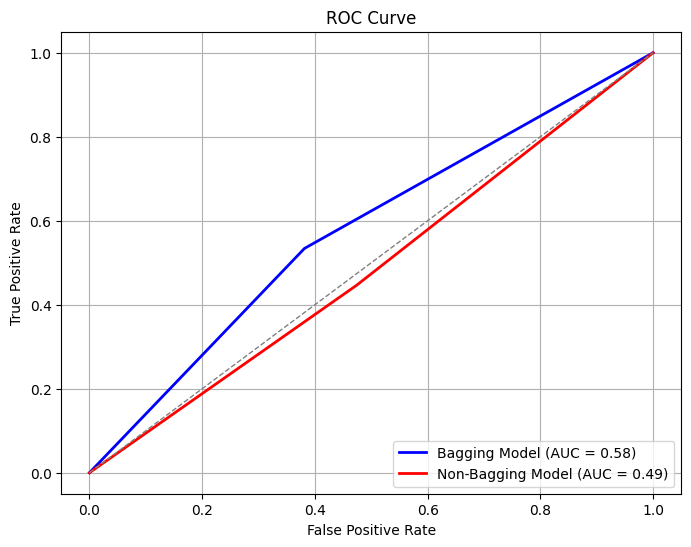

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to aggregate predictions from bagging models
def bagging_aggregate(models, X):
    predictions = np.zeros((X.shape[0], len(models)))
    for i, model in enumerate(models):
        predictions[:, i] = model.predict_proba(X)[:, 1]
    aggregated_predictions = np.mean(predictions, axis=1)
    return aggregated_predictions

# Bagging model predictions
bagging_probs = bagging_aggregate(bagging_models, X_test)
fpr_bagging, tpr_bagging, _ = roc_curve(y_test, bagging_probs)
roc_auc_bagging = auc(fpr_bagging, tpr_bagging)

# Non-bagging model predictions
non_bagging_probs = non_bagging_model.predict_proba(X_test)[:, 1]
fpr_non_bagging, tpr_non_bagging, _ = roc_curve(y_test, non_bagging_probs)
roc_auc_non_bagging = auc(fpr_non_bagging, tpr_non_bagging)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_bagging, tpr_bagging, color='blue', lw=2, label=f'Bagging Model (AUC = {roc_auc_bagging:.2f})')
plt.plot(fpr_non_bagging, tpr_non_bagging, color='red', lw=2, label=f'Non-Bagging Model (AUC = {roc_auc_non_bagging:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [5]:
# Function to make predictions for bagging models
def bagging_predict(models, X):
    predictions = np.zeros((X.shape[0], len(models)))
    for i, model in enumerate(models):
        predictions[:, i] = model.predict(X)
    aggregated_predictions = np.mean(predictions, axis=1)
    return np.round(aggregated_predictions)

# Bagging model predictions
bagging_predictions = bagging_predict(bagging_models, X_test)

# Non-bagging model accuracy
non_bagging_accuracy = accuracy_score(y_test, non_bagging_model.predict(X_test))

# Bagging model accuracy
bagging_accuracy = accuracy_score(y_test, bagging_predictions)

print(f'Bagging Model Accuracy: {bagging_accuracy:.2f}')
print(f'Non-Bagging Model Accuracy: {non_bagging_accuracy:.2f}')


Bagging Model Accuracy: 0.57
Non-Bagging Model Accuracy: 0.48
